In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import talkanalyzer as ta # Requires pandas
import warnings 
warnings.filterwarnings('ignore') # Remove for debugging
import networkx as nx
from itertools import combinations
from collections import Counter
help(ta)

Help on module talkanalyzer:

NAME
    talkanalyzer

CLASSES
    builtins.object
        CoreSet
        Network
        Printer
        TimeSeries
        URLconstructor
    
    class CoreSet(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self, searchstring, df)
     |      Takes search string and dataframe as input.
     |      Returns various time series as dicts.
     |      Seaborn distplot docs:
     |      https://seaborn.pydata.org/tutorial/distributions.html
     |  
     |  distplot(searchstring, df)
     |  
     |  frequency(searchstring, df)
     |  
     |  frequencypercent(searchstring, df)
     |  
     |  hashtagtimeseries(searchstring, df)
     |      Takes a hashtag as input, for example "womanwriter",
     |      then returns a time series describing the formation of hashtag.
     |  
     |  histogram(searchstring, df)
     |  
     |  kerneldistplot(searchstring, df)
     |  
     |  percentile(searchstring, df)
     |      To be fixed
 

In [2]:
df = pd.read_json("data/project-376-comments_2017-11-21.json")
df.head()
#df.to_excel("data/project-376-comments_2017-11-21.xlsx")
#df.insert(0, "CommentURL", "")
#df.insert(0, "ThreadURL", "")

board_description  board_id  \
0  General comment threads about individual subjects       192   
1  General comment threads about individual subjects       192   
2  Ask us about specific manuscripts, scripts, ha...       195   
3  General comment threads about individual subjects       192   
4  General comment threads about individual subjects       192   

                       board_title  \
0                            Notes   
1                            Notes   
2  Questions for the research team   
3                            Notes   
4                            Notes   

                                        comment_body      comment_created_at  \
0  Can't tell what the red/brown blob on the righ... 2015-11-09 20:50:03.309   
1  yes i agree, judging by the rough edges round ... 2015-11-10 17:11:02.277   
2  There are only a few documents displaying in t... 2015-11-14 00:41:28.637   
3                                   Nothing on here? 2015-11-27 10:39:56.197   
4                                  No text or image. 2015-11-27 10:42:46.044   

   comment_focus_id comment_focus_type  comment_id  comment_user_id  \
0         1071522.0            Subject       33075          1396273   
1         1071522.0            Subject       33406             1813   
2               NaN               None       34596          1372521   
3         1167235.0            Subject       38341           478315   
4         1169357.0            Subject       38342           478315   

  comment_user_login  discussion_id             discussion_title  
0            Sprixie          16496              Subject 1071522  
1        hightower73          16496              Subject 1071522  
2        Judy_Prouty          17263  Is this project proceeding?  
3          darktruth          19021              Subject 1167235  
4          darktruth          19022              Subject 1169357

In [31]:
hashtags = []

for row in df.iterrows():
    match = re.findall(r'\#[a-zA-Z0-9]+', row[1][3], re.IGNORECASE)
    for m in match:
        hashtags.append(m.lower())
print(len(hashtags))
print(len(set(hashtags)))

4126
946


In [35]:
'''Get most common hashtags'''
c = Counter(hashtags)
c.most_common(20)

[('#letter', 302),
 ('#oed', 238),
 ('#recipe', 222),
 ('#medicine', 162),
 ('#latin', 143),
 ('#womanwriter', 139),
 ('#catholic', 129),
 ('#copiedletter', 120),
 ('#v', 79),
 ('#address', 79),
 ('#medical', 64),
 ('#cooking', 59),
 ('#bleedthrough', 58),
 ('#ward', 58),
 ('#paper', 54),
 ('#packe', 50),
 ('#baker', 45),
 ('#cromwell', 35),
 ('#food', 34),
 ('#corlyon', 33)]

#letter 302
#oed 238
#recipe 222
#medicine 162
#latin 143
#womanwriter 139
#catholic 129
#copiedletter 120
#v 79
#address 79
#medical 64
#cooking 59
#bleedthrough 58
#ward 58
#paper 54
#packe 50
#baker 45
#cromwell 35
#food 34
#corlyon 33
#recipes 32
#catholics 31
#index 31
#badcatalogue 29
#state 28
#water 25
#raleigh 25
#recusants 24
#dots 20
#recipes2try 18
#walterbagot 18
#correction 18
#digby 16
#slits 16
#seal 15
#typea 15
#dailyzoo 14
#diary 14
#ireland 14
#fruit 14
#notletter 14
#webster 13
#spain 13
#recipe2try 11
#draft 11
#shorthand 11
#cookbook 10
#university 10
#privycouncil 10
#medicines 9
#unsure 9
#chetwynd 9
#religion 9
#plague 9
#herbs 8
#autobiography 8
#essex 8
#book 8
#french 8
#bacon 8
#symbol 8
#pope 8
#animals 8
#thomascrompton 8
#preserving 7
#blank 7
#personofinterest 7
#typek 7
#remedy 6
#magic 6
#king 6
#cookery 6
#marriage 6
#toc 6
#code 6
#meat 6
#francisbacon 6
#duplicate 6
#richardbroughton 6
#thomasdocksie 6
#jesuits 6
#shakespeare 6
#duel 6
#pie 5
#ast

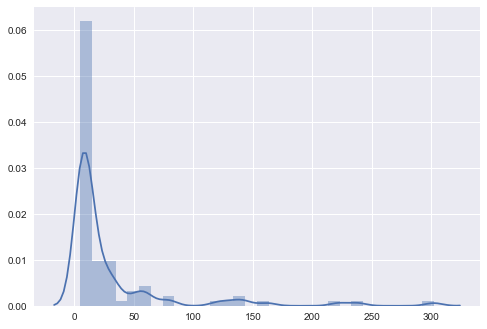

In [62]:
valuelist = []
for v in c.most_common(1000):
    if v[1] >= 5:
        valuelist.append(v[1])
        print(v[0], v[1])
    else:
        continue
        #print(v[0])
print(len(valuelist))
print(valuelist)
sns.distplot(valuelist)

### Hashtag/user network
This takes a hashtag and then plots a network based on which users that has written about it in the forum. The closer to the center concept, the more often the users write about it. The function:

````python
def makegraph(searchstring, nodefreq, regexp=False, users=True, plot=True)
````

In [66]:
ta.CoreSet.frequency("#v", df)

Searching for: #v


[]

In [69]:
ta.CoreSet.frequencypercent("#medical", df)

Searching for: #medical
Total hashtags: 48


[('fromere', 0.23),
 ('kodemunkey', 0.17),
 ('Archi', 0.06),
 ('Kimnj', 0.06),
 ('griddlesticks', 0.06),
 ('joolslee', 0.06),
 ('Dizzy78', 0.06),
 ('Bladud', 0.06),
 ('Captain_Video', 0.04),
 ('LWSmith', 0.04),
 ('Antihelios', 0.04),
 ('Citranine', 0.04),
 ('MayorBatman', 0.02),
 ('hightower73', 0.02),
 ('Woo-H', 0.02)]

In [76]:
for t in ta.CoreSet.hashtagtimeseries("#corlyon", df).iterrows():
    print(t[1][0])
    print(t[1][1])
    print(t[1][2])
    print(t[1][3])
    print("------")


Cuboctahedron
2016-02-05 14:30:22.280000
#corlyon
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/38112?comment=75597
------
Citranine
2016-04-14 21:35:22.922000
#corlyon
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/49652?comment=98654
------


In [5]:
ta.CoreSet.hashtagtimeseries("#womanwriter", df)['Timestamp']

0    2015-12-10 16:48:16.372
1    2015-12-10 17:51:43.537
2    2015-12-10 18:03:14.555
3    2015-12-10 18:09:08.853
4    2015-12-10 23:28:41.703
5    2015-12-11 16:34:15.917
6    2015-12-11 17:23:19.682
7    2015-12-11 18:29:33.553
8    2015-12-11 20:00:52.875
9    2015-12-13 02:47:33.379
10   2015-12-13 14:06:09.771
11   2015-12-13 14:19:43.119
12   2015-12-14 15:23:51.972
13   2015-12-14 17:04:48.450
14   2015-12-15 09:32:18.498
15   2015-12-15 13:48:17.294
16   2015-12-15 19:53:43.351
17   2015-12-16 14:30:09.570
18   2015-12-16 16:19:27.774
19   2015-12-18 16:51:35.822
20   2015-12-18 22:49:03.204
21   2015-12-18 23:40:12.901
22   2015-12-20 16:24:36.157
23   2015-12-21 13:17:55.799
24   2015-12-21 19:20:17.265
25   2015-12-21 19:34:35.142
26   2015-12-22 18:18:11.706
27   2015-12-22 19:49:03.268
28   2015-12-24 13:02:26.785
29   2015-12-24 14:29:04.819
               ...          
62   2016-02-20 16:22:06.196
63   2016-02-26 15:40:03.017
64   2016-03-04 14:47:31.934
65   2016-03-1

In [75]:
searchterm = "#corlyon"

X = ta.CoreSet.hashtagtimeseries(searchterm, df)['Timestamp']
user = list(range((len(X))))
userlist = ta.CoreSet.hashtagtimeseries(searchterm, df)['User']
factorized = pd.factorize(userlist)
print(factorized[0])
#print(c)

[0 1]


In [65]:
hexlist = []
for f in factorized[0]:
    hexlist.append(str('{0:06X}'.format(f*560000)))

['000000', '000000', '088B80', '111700', '19A280', '111700', '222E00', '2AB980', '334500', '3BD080', '3BD080', '445C00', '445C00', '445C00', '2AB980', '088B80', '111700', '111700', '111700', '2AB980', '4CE780', '557300', '557300', '5DFE80', '000000', '111700', '668A00', '668A00', '445C00', '5DFE80', '000000', '111700', '5DFE80', '668A00', '111700', '111700', '111700', '111700', '6F1580', '5DFE80', '000000', '111700', '5DFE80', '445C00', '6F1580', '445C00', '2AB980', '111700', '111700', '445C00', '111700', '000000', '000000', '000000', '77A100', '802C80', '445C00', '445C00', '445C00', '000000', '000000', '000000', '000000', '000000', '88B800', '6F1580', '000000', '000000', '914380', '000000', '000000', '000000', '99CF00', '000000', '000000', '000000', '000000', '000000', '000000', '000000', '000000', '99CF00', '000000', '000000', '000000', '000000', '000000', '99CF00', '99CF00', '000000', '000000', '99CF00', '000000']


TypeError: zip argument #1 must support iteration

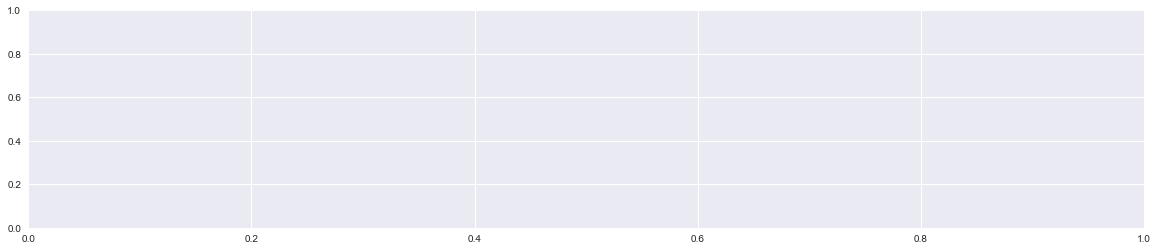

In [90]:
fig, ax = plt.subplots(figsize=(20,4))
userlist = ta.CoreSet.hashtagtimeseries(searchterm, df)['Timestamp']
color = [item for item in hexlist]
print(color)

test = ['C1', 'C2', 'C3']

#plt.plot(X, user, 'ro')
for X, user, color in zip(X, user, color):
    print(X, user, color)

#plt.plot(X, user, ".", color=('111700'))

#fig.autofmt_xdate()

plt.show()




fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

titles = ['Linear', 'Squared', 'Cubic', 'Quartic']
y_vals = [x, x * x, x**3, x**4]

# axes.flat returns the set of axes as a flat (1D) array instead
# of the two-dimensional version we used earlier
for ax, title, y in zip(axes.flat, titles, y_vals):
    ax.plot(x, y)
    ax.set_title(title)
    ax.grid(True)

Searching for: #oed


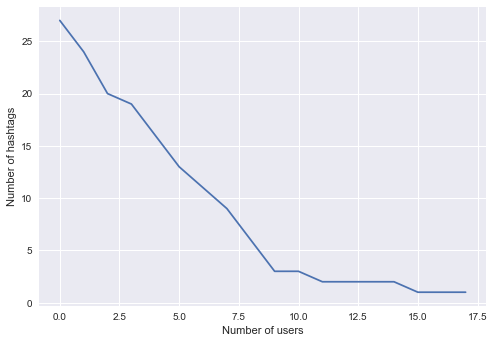

In [8]:
ta.CoreSet.histogram("#oed", df)

Searching for: #oed


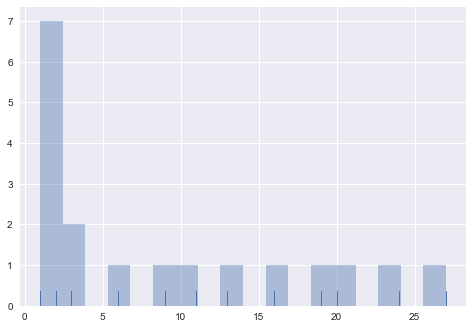

In [91]:
ta.CoreSet.distplot("#oed", df)

Searching for: #womanwriter


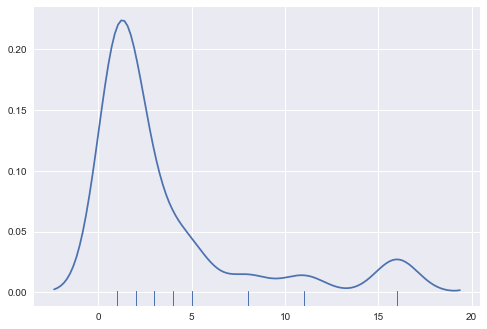

In [92]:
ta.CoreSet.kerneldistplot("#womanwriter", df)

Searching for: #letter


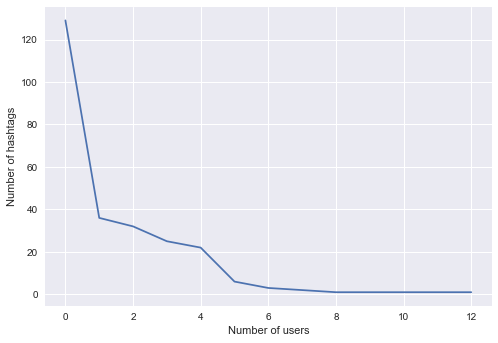

Searching for: #letter


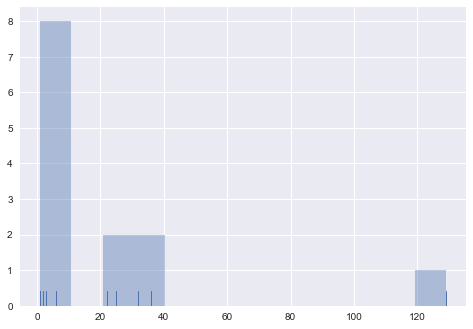

---------------
Searching for: #oed


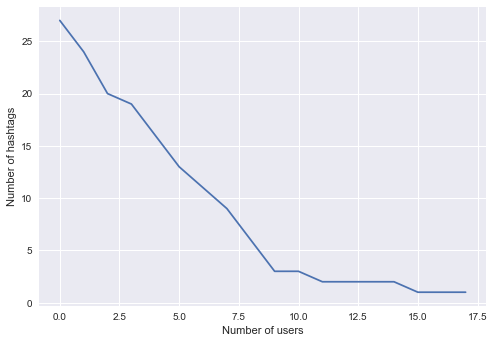

Searching for: #oed


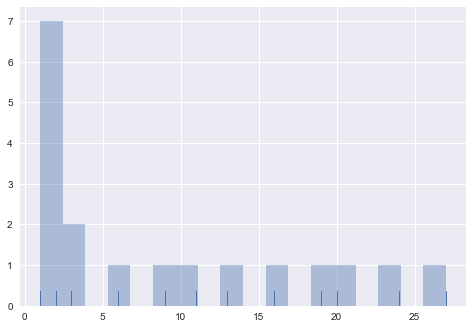

---------------
Searching for: #recipe


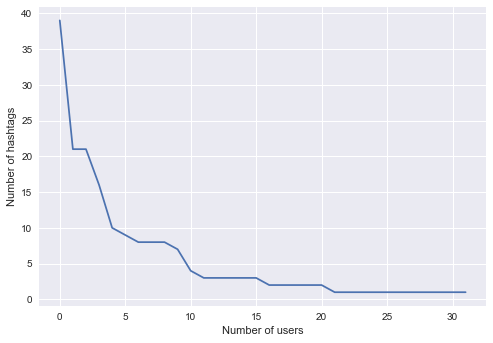

Searching for: #recipe


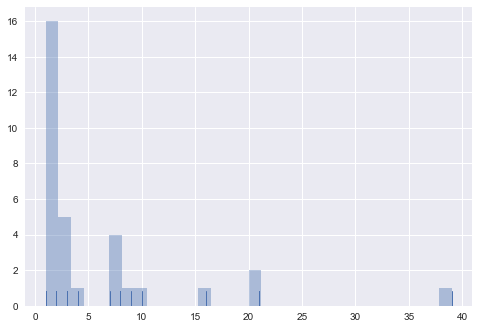

---------------
Searching for: #medicine


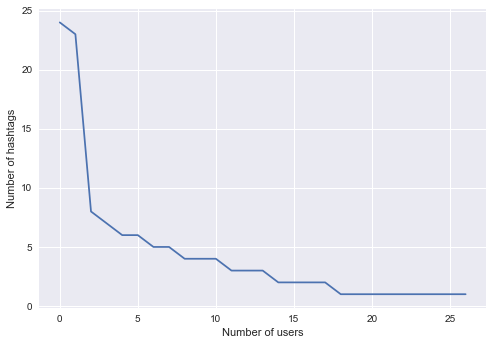

Searching for: #medicine


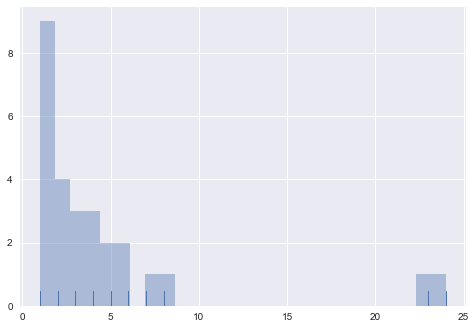

---------------
Searching for: #latin


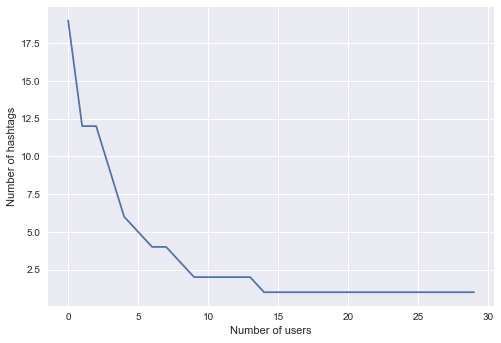

Searching for: #latin


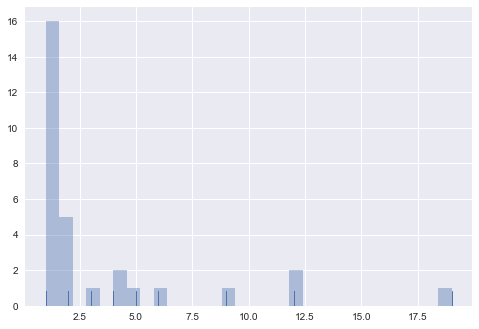

---------------
Searching for: #womanwriter


KeyboardInterrupt: 

In [5]:
'''Print graphs and stuff'''
for hashtag in c.most_common(10):
    ta.CoreSet.histogram(hashtag[0], df)
    ta.CoreSet.distplot(hashtag[0], df)
    print("---------------")

In [ ]:
ta.Network.hashtagusernetwork("#food", df, plot=True, html=False)


In [ ]:
ta.Printer.regexpsearch('herb', df, html=False, context=True)

In [ ]:
ta.TimeSeries.regexpsearch('cathol', df)

In [ ]:
# Most common URLs linked. Note: fix regular expression to be more accurate. 
listofURLS = []
for row in df.iterrows():
    topURL = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', row[1][3])
    if topURL:
        for t in topURL:
            listofURLS.append(t)
            
from collections import Counter

for key in Counter(listofURLS).most_common(20):
    print(key)

In [ ]:
def createThreadUserNet(dataframe):
    # Intialize network file
    gexf = Gexf("Shakespeares World", "Thread User Network")
    graph = gexf.addGraph("directed", "static", "Thread User directed network")

    # Create nodes
    for user in df.comment_user_login.iteritems():
        graph.addNode(str(user[1]), str(user[1]))

    for thread in df.discussion_id.iteritems():
        graph.addNode(str(thread[1]), str(thread[1]))

    # Create edges
    counter = 0
    for x in df.iterrows():
        counter += 1
        #print(x[1][9]) # Username
        # print(x[1][10]) # Comment thread ID
        graph.addEdge(str(counter), str(x[1][9]), str(x[1][10]))

    # Write file. Note: all nodes and edges need to be added as unicode strings
    output_file = open("shakspearesworldThreadUserNet.gexf","wb")
    gexf.write(output_file)

#createThreadUserNet(df)

In [ ]:
ta.Network.hashtaghashtagnetwork("#herbs", df)

### Regexp/user network
Similar to the hashtag/user network but using the power of Python flavoured regexps. Case insensivive. 

In [ ]:
list(range(72))


In [ ]:
ta.Network.regexpusernetwork("packe", df)

In [ ]:
ta.Network.regexpusers("copyright", df, data=True) #returns data for plotting

### User/hashtag network
Tracks what hashtag a specific username writes. 

In [ ]:
ta.Network.userhashtagnetwork("Traceydix", df)

### User/user network
Takes a specific user and draws a network from the users spoken to, using the @username convention. 

This is an out-degree network. 

** Todo **: make in-degree network to see which users address a user (comparable to incoming @-tweets on Twitter). 

In [ ]:
ta.Network.userusernetwork("VVH", df)